In [1]:
pip install pandas numpy matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data

df = pd.read_excel('h243.xlsx')

In [5]:
df.head()

,DUID,PID,DUPERSID,PANEL,DATAYEAR,FAMID31,FAMID42,FAMID53,FAMID22,FAMIDYR,...,RXOSR22,RXPTR22,RXOTH22,PERWT22F,FAMWT22F,FAMWT22C,SAQWT22F,DIABW22F,VARSTR,VARPSU
0,2460002,101,2460002101,24,2022,A,A,A,A,A,...,0,0,0,5728.309495,5232.211986,5232.211986,3994.687140,6034.636755,2082,1
1,2460006,101,2460006101,24,2022,A,A,A,A,A,...,0,0,0,15648.881461,16017.881691,16017.881691,0.000000,0.000000,2001,4
2,2460006,102,2460006102,24,2022,A,A,A,A,A,...,0,0,0,14123.720178,16017.881691,12580.731740,0.000000,0.000000,2001,4
3,2460010,101,2460010101,24,2022,A,A,A,A,A,...,0,5288,299,16982.054917,21905.758877,21905.758877,0.000000,0.000000,2038,3
4,2460018,101,2460018101,24,2022,A,A,A,A,A,...,0,10,0,10682.619947,11344.291012,11344.291012,17152.439412,0.000000,2041,1


In [6]:
# Select the columns of interest

df_selected = df[['TOTEXP22', 'OBTOTV22', 'AGE22X', 'INS22X', 'FAMINC22']]

In [7]:
# 

df_selected.head(20)

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
0,15766,2,77,1,22000
1,12697,28,64,1,5000
2,3405,1,67,1,30740
3,9265,16,29,1,106483
4,3362,8,51,1,45000
5,35,0,58,2,47405
6,5710,6,42,1,40000
7,1389,1,8,1,40000
8,18165,8,53,1,98000
9,9984,10,69,1,98000


In [8]:
# Check for missing values

df_selected.isnull().sum()

TOTEXP22    0
OBTOTV22    0
AGE22X      0
INS22X      0
FAMINC22    0
dtype: int64

In [9]:
# checking for data types

df_selected.dtypes

TOTEXP22    int64
OBTOTV22    int64
AGE22X      int64
INS22X      int64
FAMINC22    int64
dtype: object

In [10]:
df_selected.describe()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
count,2.243100e+04,22431.000000,22431.000000,22431.000000,22431.000000
mean,7.639477e+03,6.743480,42.963756,1.077482,90706.437921
std,2.299367e+04,13.030562,23.998943,0.351631,88577.276556
min,0.000000e+00,0.000000,-1.000000,-1.000000,-635454.000000
25%,2.600000e+02,0.000000,22.000000,1.000000,30000.000000
50%,1.605000e+03,2.000000,44.000000,1.000000,65800.000000
75%,6.409000e+03,7.000000,63.000000,1.000000,125000.000000
max,1.338276e+06,341.000000,85.000000,2.000000,787696.000000


In [11]:
# Check for outliers

df_selected[df_selected['FAMINC22'] <= 0]#.count()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
40,2977,1,63,1,0
57,632,0,49,1,0
73,0,0,32,1,0
75,0,0,15,1,0
76,0,0,14,1,0
...,...,...,...,...,...
22238,0,0,31,1,0
22239,648,2,11,1,0
22240,75,1,5,1,0
22323,4172,16,74,1,0


In [12]:
df_selected = df_selected[df_selected['FAMINC22'] >= 0]

In [13]:
df_selected.describe()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
count,2.241400e+04,22414.000000,22414.000000,22414.000000,22414.000000
mean,7.641098e+03,6.741590,42.970197,1.077318,90971.361649
std,2.299924e+04,13.025702,24.000474,0.351489,87727.673669
min,0.000000e+00,0.000000,-1.000000,-1.000000,0.000000
25%,2.600000e+02,0.000000,22.000000,1.000000,30000.000000
50%,1.605000e+03,2.000000,44.000000,1.000000,65916.000000
75%,6.415500e+03,7.000000,63.000000,1.000000,125000.000000
max,1.338276e+06,341.000000,85.000000,2.000000,787696.000000


<Axes: xlabel='OBTOTV22', ylabel='TOTEXP22'>

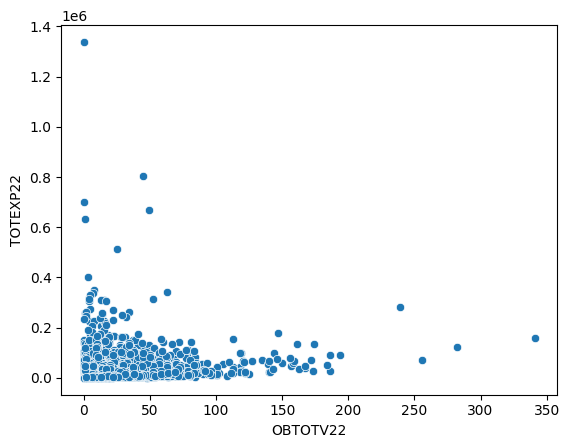

In [14]:
sns.scatterplot(x='OBTOTV22', y='TOTEXP22', data=df_selected)

In [15]:
df_selected[df_selected['TOTEXP22']>0.4*1e6]

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
7028,1338276,0,19,1,27840
7263,667004,49,46,1,112151
12725,512939,25,27,2,9000
15488,403457,3,21,1,205205
20865,802849,45,36,1,156810
21993,633472,1,9,1,161616
22168,699295,0,-1,-1,12756


<Axes: xlabel='OBTOTV22', ylabel='TOTEXP22'>

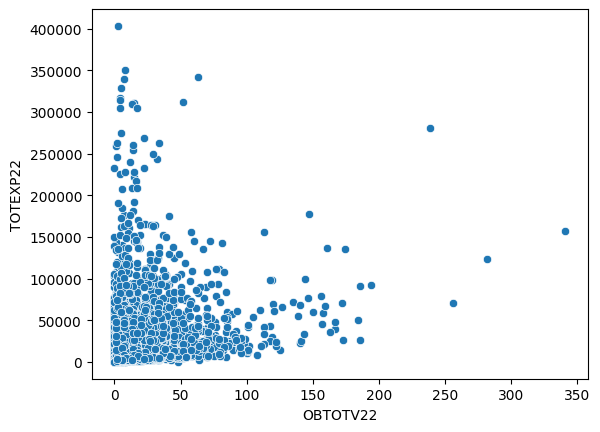

In [16]:
# Remove the outliers

sns.scatterplot(x='OBTOTV22', y='TOTEXP22', data=df_selected[df_selected['TOTEXP22'] < 0.5*1e6])

In [17]:
# correlation
# df_selected[df_selected['TOTEXP22'] < 0.5*1e6].corr()

df_selected.corr()

,TOTEXP22,OBTOTV22,AGE22X,INS22X,FAMINC22
TOTEXP22,1.000000,0.317369,0.162416,-0.094752,-0.021431
OBTOTV22,0.317369,1.000000,0.201539,-0.078060,0.018646
AGE22X,0.162416,0.201539,1.000000,0.031901,-0.079152
INS22X,-0.094752,-0.078060,0.031901,1.000000,-0.068801
FAMINC22,-0.021431,0.018646,-0.079152,-0.068801,1.000000


<Axes: >

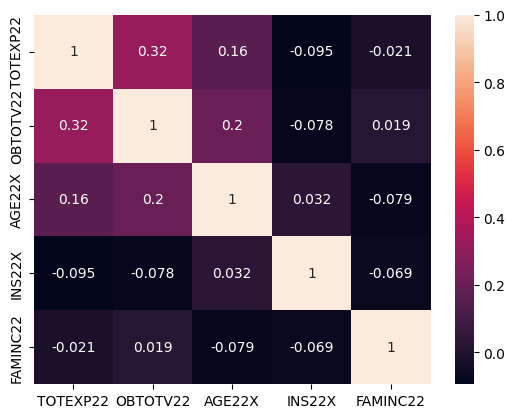

In [18]:
# correlation matrix, heatmap

# sns.heatmap(df_selected[df_selected['TOTEXP22'] < 0.5*1e6].corr(), annot=True)

sns.heatmap(df_selected.corr(), annot=True)

 the correlation shows weak Positive for Number of Office visit OBTOTV22 so more visit somewhat increases costs but not a lot. Age is very weak at 0.162 So barely Increase expenditure, The insurance is very, very weak at -0.094 So therefore has no effect. And the family income FAMINC22 Basically, has no correlation at -0.021

So I'm going to run a quick regression to see what what we can learn even with those weak correlations. I'm going to use the expenditure as dependent variable and the other four variables as predictors or Independent.

In [19]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [21]:
# regression

import statsmodels.api as sm

# Define predictors (add a constant for the intercept)
X = sm.add_constant(df_selected[['OBTOTV22', 'AGE22X', 'INS22X', 'FAMINC22']])
y = df_selected['TOTEXP22']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TOTEXP22   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     742.6
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:40:26   Log-Likelihood:            -2.5552e+05
No. Observations:               22414   AIC:                         5.110e+05
Df Residuals:                   22409   BIC:                         5.111e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5881.5376    565.190     10.406      0.0

<Axes: xlabel='AGE22X', ylabel='OBTOTV22'>

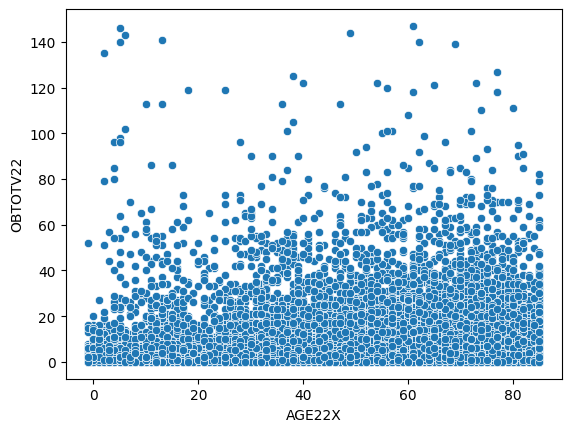

In [23]:
# Plot scatter plot to see the correlation between AGE22X and OBTOTV22

sns.scatterplot(x='AGE22X', y='OBTOTV22', data=df_selected[df_selected['OBTOTV22'] < 150])

<Axes: xlabel='AGE22X', ylabel='TOTEXP22'>

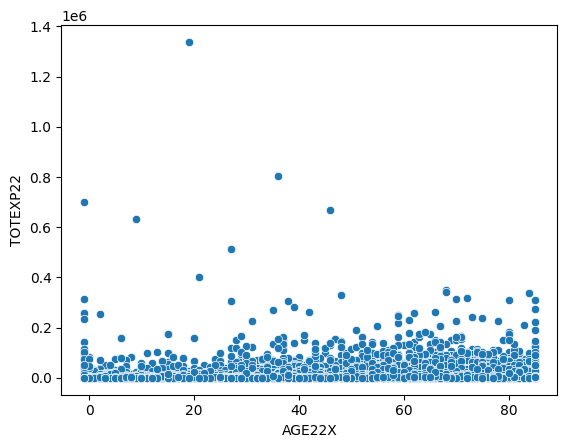

In [26]:
# Remove the outliers

sns.scatterplot(x='AGE22X', y='TOTEXP22', data=df_selected)

In [46]:
# checking the df for other variabes to include

df.columns.tolist()

['DUID',
 'PID',
 'DUPERSID',
 'PANEL',
 'DATAYEAR',
 'FAMID31',
 'FAMID42',
 'FAMID53',
 'FAMID22',
 'FAMIDYR',
 'CPSFAMID',
 'FCSZ1231',
 'FCRP1231',
 'RULETR31',
 'RULETR42',
 'RULETR53',
 'RULETR22',
 'RUSIZE31',
 'RUSIZE42',
 'RUSIZE53',
 'RUSIZE22',
 'RUCLAS31',
 'RUCLAS42',
 'RUCLAS53',
 'RUCLAS22',
 'FAMSZE31',
 'FAMSZE42',
 'FAMSZE53',
 'FAMSZE22',
 'FMRS1231',
 'FAMS1231',
 'FAMSZEYR',
 'FAMRFPYR',
 'REGION31',
 'REGION42',
 'REGION53',
 'REGION22',
 'REFPRS31',
 'REFPRS42',
 'REFPRS53',
 'REFPRS22',
 'RESP31',
 'RESP42',
 'RESP53',
 'RESP22',
 'PROXY31',
 'PROXY42',
 'PROXY53',
 'PROXY22',
 'INTVLANG',
 'INTVTYPE31',
 'INTVTYPE42',
 'INTVTYPE53',
 'BEGRFM31',
 'BEGRFY31',
 'ENDRFM31',
 'ENDRFY31',
 'BEGRFM42',
 'BEGRFY42',
 'ENDRFM42',
 'ENDRFY42',
 'BEGRFM53',
 'BEGRFY53',
 'ENDRFM53',
 'ENDRFY53',
 'ENDRFM22',
 'ENDRFY22',
 'KEYNESS',
 'INSCOP31',
 'INSCOP42',
 'INSCOP53',
 'INSCOP22',
 'INSC1231',
 'INSCOPE',
 'ELGRND31',
 'ELGRND42',
 'ELGRND53',
 'ELGRND22',
 'PSTATS31'

Also from inspecting the documentation, DIABDX_M18, IPDIS22, and RXEXP22 are good predictors of hospital expenditures to include.


In [ ]:
# inspecting the new variables using data wrangler extenstion to quickly get some insights on the frequencies of the observations

df

,DUID,PID,DUPERSID,PANEL,DATAYEAR,FAMID31,FAMID42,FAMID53,FAMID22,FAMIDYR,...,RXOSR22,RXPTR22,RXOTH22,PERWT22F,FAMWT22F,FAMWT22C,SAQWT22F,DIABW22F,VARSTR,VARPSU
0,2460002,101,2460002101,24,2022,A,A,A,A,A,...,0,0,0,5728.309495,5232.211986,5232.211986,3994.687140,6034.636755,2082,1
1,2460006,101,2460006101,24,2022,A,A,A,A,A,...,0,0,0,15648.881461,16017.881691,16017.881691,0.000000,0.000000,2001,4
2,2460006,102,2460006102,24,2022,A,A,A,A,A,...,0,0,0,14123.720178,16017.881691,12580.731740,0.000000,0.000000,2001,4
3,2460010,101,2460010101,24,2022,A,A,A,A,A,...,0,5288,299,16982.054917,21905.758877,21905.758877,0.000000,0.000000,2038,3
4,2460018,101,2460018101,24,2022,A,A,A,A,A,...,0,10,0,10682.619947,11344.291012,11344.291012,17152.439412,0.000000,2041,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22426,2799694,101,2799694101,27,2022,A,A,A,A,A,...,0,231,0,21490.058502,24757.243908,24757.243908,30689.883735,0.000000,2015,2
22427,2799694,102,2799694102,27,2022,A,A,A,A,A,...,0,79,0,18828.710297,24757.243908,24757.243908,22648.236877,0.000000,2015,2
22428,2799695,101,2799695101,27,2022,A,A,A,A,A,...,0,0,0,15992.756873,18382.130170,18382.130170,20512.235130,0.000000,2045,1
22429,2799698,101,2799698101,27,2022,A,A,A,A,A,...,0,578,0,15771.415106,15430.797933,15430.797933,0.000000,0.000000,2103,3


In [ ]:
# selecting the new variables

df_new = df[['DIABDX_M18', 'IPDIS22', 'RXEXP22']].copy()

In [50]:
# DIABDX_M18 has values ranging from 0 to -8. I'm simplifying DIABDX_M18 to a yes/no flag—1 for “yes” (has diabetes), 0 for “no” (doesn’t have it). We’ll filter out the negative codes (-1, -7, -8) since they’re not useful for our regression.

df_new['DIABDX_M18'] = df_new['DIABDX_M18'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else np.nan)
df_new = df_new.dropna(subset=['DIABDX_M18'])

In [51]:
# merging the 3 new variables to the selected variables

df_selected = df_selected.merge(df_new, left_index=True, right_index=True, how='inner')
df_selected = df_selected.dropna()

In [54]:
import statsmodels.api as sm

X = sm.add_constant(df_selected[['OBTOTV22', 'AGE22X', 'INS22X', 'FAMINC22', 'DIABDX_M18', 'IPDIS22', 'RXEXP22']])
y = df_selected['TOTEXP22']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TOTEXP22   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     5183.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:43:44   Log-Likelihood:            -2.4448e+05
No. Observations:               22268   AIC:                         4.890e+05
Df Residuals:                   22260   BIC:                         4.890e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2122.9232    383.347      5.538      0.0

In [55]:
X = sm.add_constant(df_selected[['OBTOTV22', 'AGE22X', 'INS22X', 'FAMINC22', 'IPDIS22', 'RXEXP22']])
y = df_selected['TOTEXP22']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TOTEXP22   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     6046.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:46:07   Log-Likelihood:            -2.4449e+05
No. Observations:               22268   AIC:                         4.890e+05
Df Residuals:                   22261   BIC:                         4.890e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2148.4786    382.993      5.610      0.0